<a href="https://colab.research.google.com/github/adhang/lendingclub-loan-credit-risk/blob/main/LendingClub_Loan_Credit_Risk_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LendingClub - Loan Credit Prediction

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

I have already written my EDA in another notebook. Therefore, I won't cover it here.

# Libraries

## Installing Libraries

In [1]:
!pip install inflection
!pip install dython

!pip install datawig
!pip install missingno

!pip install xgboost
!pip install lightgbm
!pip install catboost

!pip install optuna
!pip install shap

!pip install --upgrade pandas
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade scikit-learn
!pip install --upgrade matplotlib
!pip install --upgrade seaborn

## Importing Libraries

In [1]:
# data manipulation
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

# statistics
from scipy import stats

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# CamelCase to snake_case
import inflection

# missing values
import missingno as msno

# missing values imputation
import datawig

# association between attributes
from dython.nominal import associations

# train test split
from sklearn.model_selection import train_test_split

# encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

# oversampling
from imblearn.over_sampling import SMOTE

# model
import catboost as cb
from catboost import CatBoostClassifier

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgbm
from lightgbm import LGBMClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

# model evaluation & hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# hyperparameter tuning
import optuna

# Dataset Overview

## Reading Dataset

In [3]:
path = '/content/drive/MyDrive/My Projects/2022/Internship - id x partners/dataset/loan_data_2007_2014.csv'

data = pd.read_csv(path, dtype={'desc':str})
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.654,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The first column (`Unnamed: 0`) is just like an index, so I'll drop it.

In [5]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.654,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Duplicated Values

In [4]:
data.duplicated().sum()

0

There's no duplicated value, good start.

## Data Types

### Numeric

In [6]:
data.select_dtypes(include=np.number).head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.654,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Categorical

In [7]:
data.select_dtypes(exclude=np.number).head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-15,NaN,Jan-16,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,Apr-99,f,Apr-13,NaN,Sep-13,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,Nov-01,f,Jun-14,NaN,Jan-16,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,Feb-96,f,Jan-15,NaN,Jan-15,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,Jan-96,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL


## Missing Values

### Tabular

In [8]:
# total null values
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage_null'})

# combine the columns
data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T

# only show columns that have missing values
mask = data_null['total_null'] != 0
with pd.option_context('display.precision', 0):
  display(data_null.loc[mask].sort_values('total_null', ascending=False).style.background_gradient())

,total_null,percentage_null
dti_joint,466285,100
annual_inc_joint,466285,100
total_cu_tl,466285,100
inq_fi,466285,100
all_util,466285,100
max_bal_bc,466285,100
open_rv_24m,466285,100
open_rv_12m,466285,100
il_util,466285,100
total_bal_il,466285,100


### Bar Plot

<AxesSubplot:>

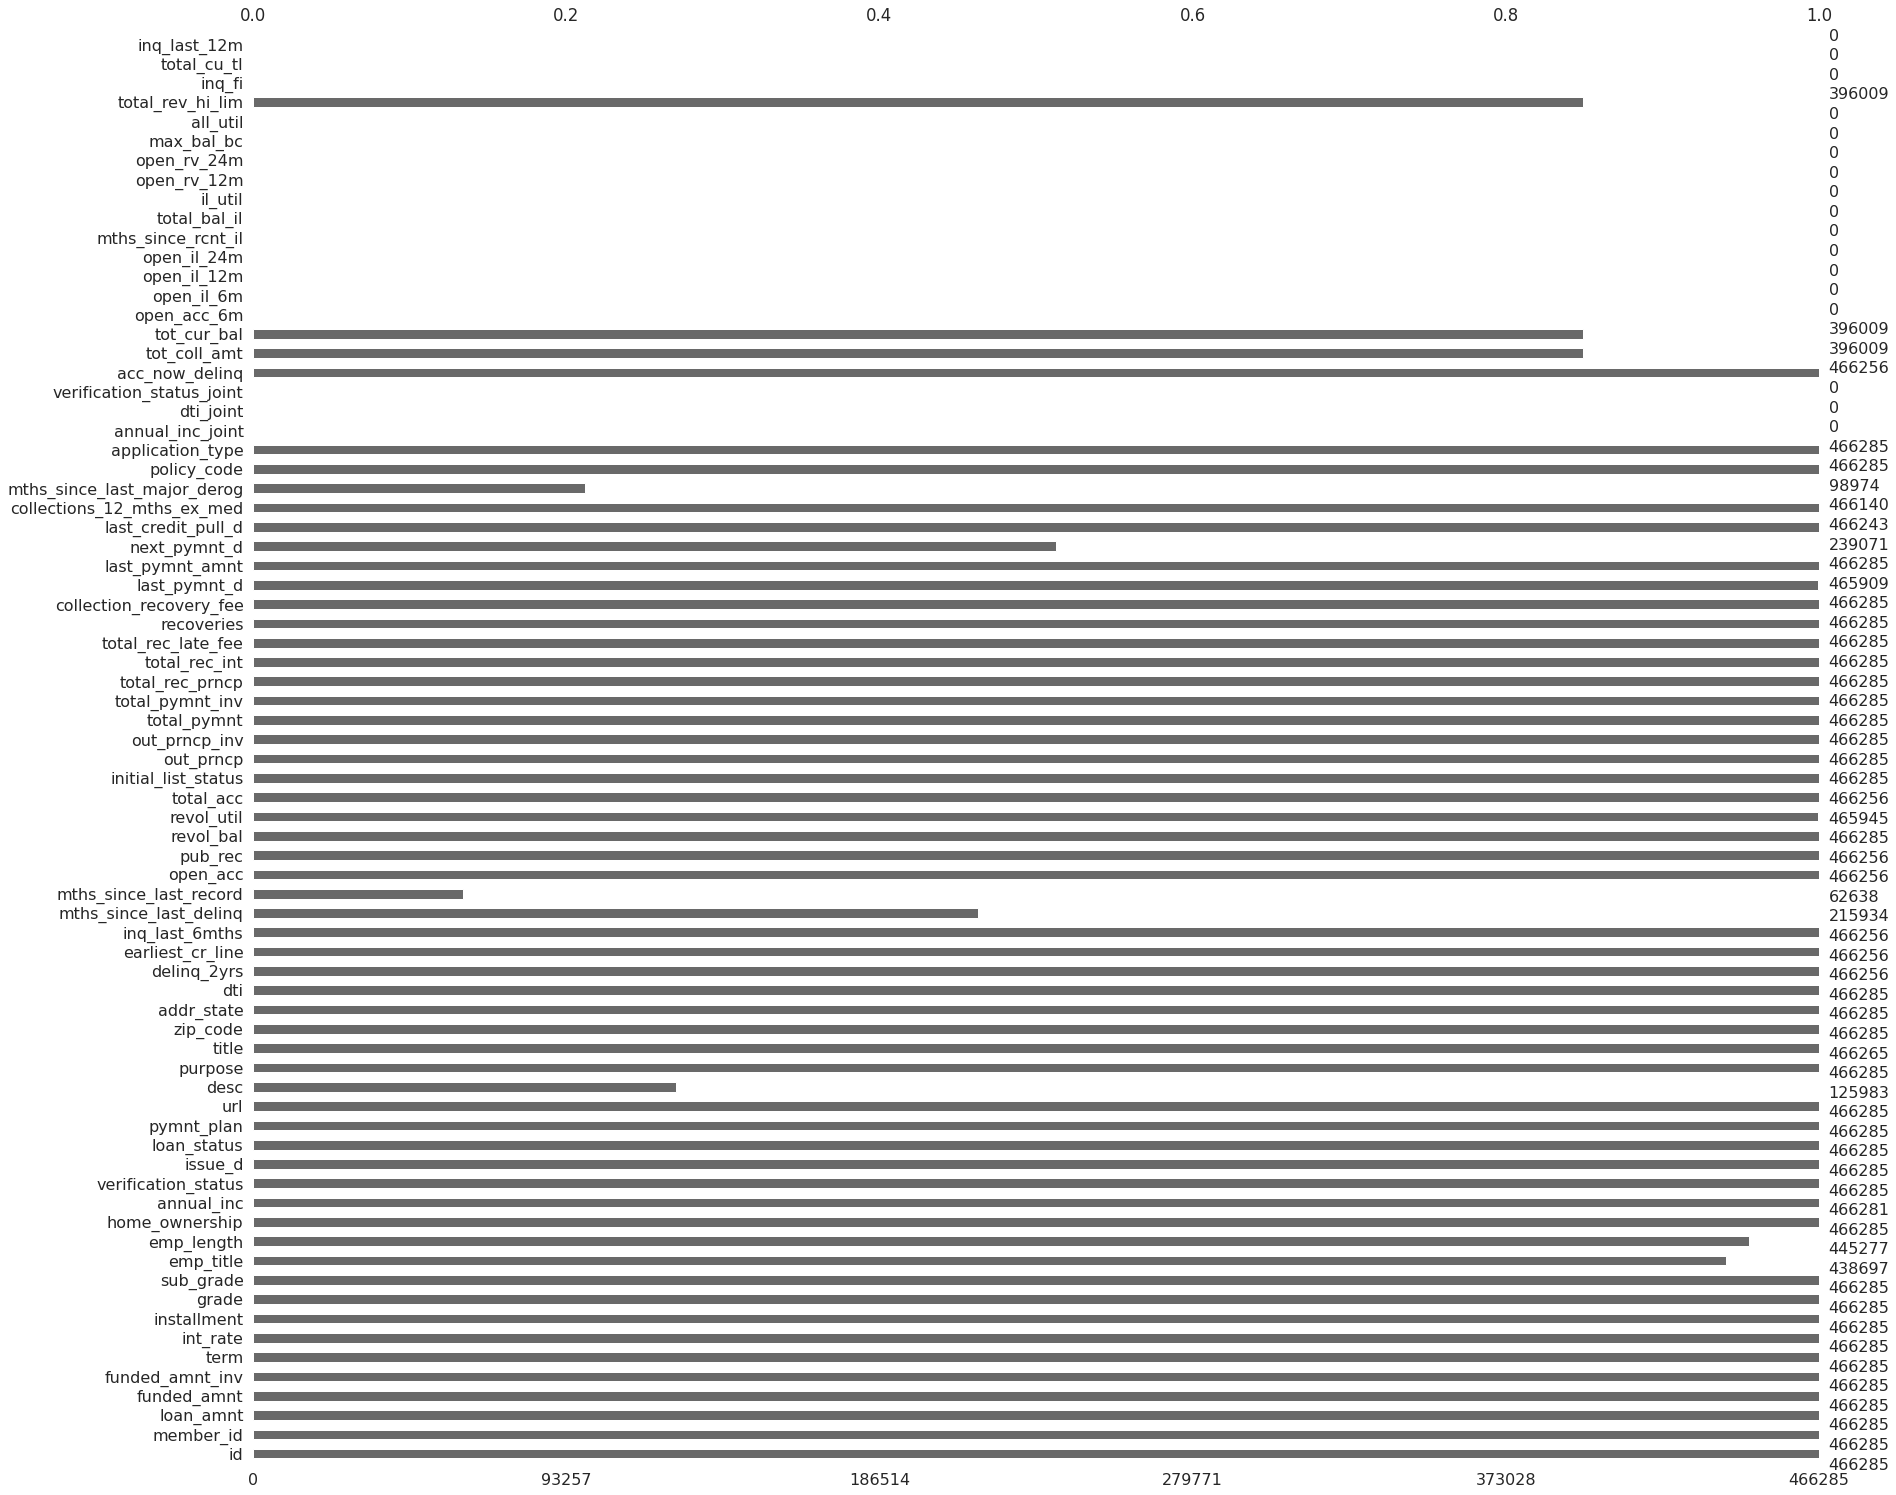

In [9]:
msno.bar(data)

As we can see, there are some columns that have pretty much missing values. Moreover, some columns contain only missing values.

### Correlation Heatmap

The `missingno` correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.
<br><br>

Nullity correlation ranges from `-1` (if one variable appears the other definitely does not) to `0` (variables appearing or not appearing have no effect on one another) to `1` (if one variable appears the other definitely also does).
<br><br>

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization.
<br><br>

Source: [missingno documentation](https://github.com/ResidentMario/missingno)

<AxesSubplot:>

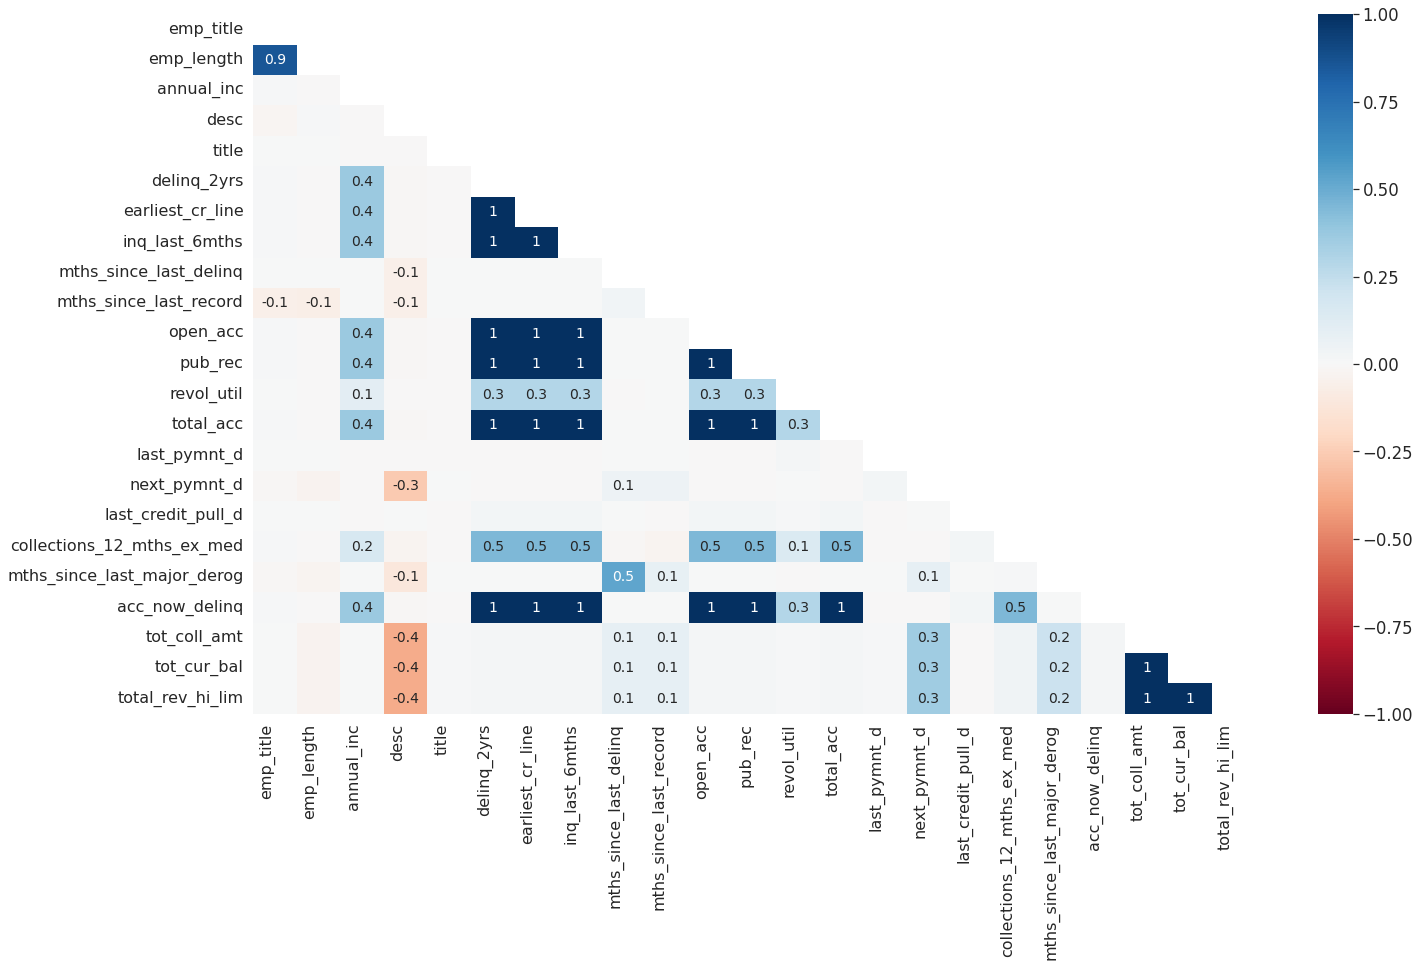

In [10]:
msno.heatmap(data, label_rotation=90)

- In this dataset, we can see that there are many columns that have perfect correlation (correlation = 1). For example, it seems that if the `tot_rev_hi_lim` is null, then the `total_coll_amt` and `tot_cur_bal` are null too.
- Employment title (`emp_title`) and employment lenght (`emp_length`) have high correlation, but not perfect. We can recheck those columns.

### Dendrogram

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.
<br><br>

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.
<br><br>

Source: [missingno documentation](https://github.com/ResidentMario/missingno)

<AxesSubplot:>

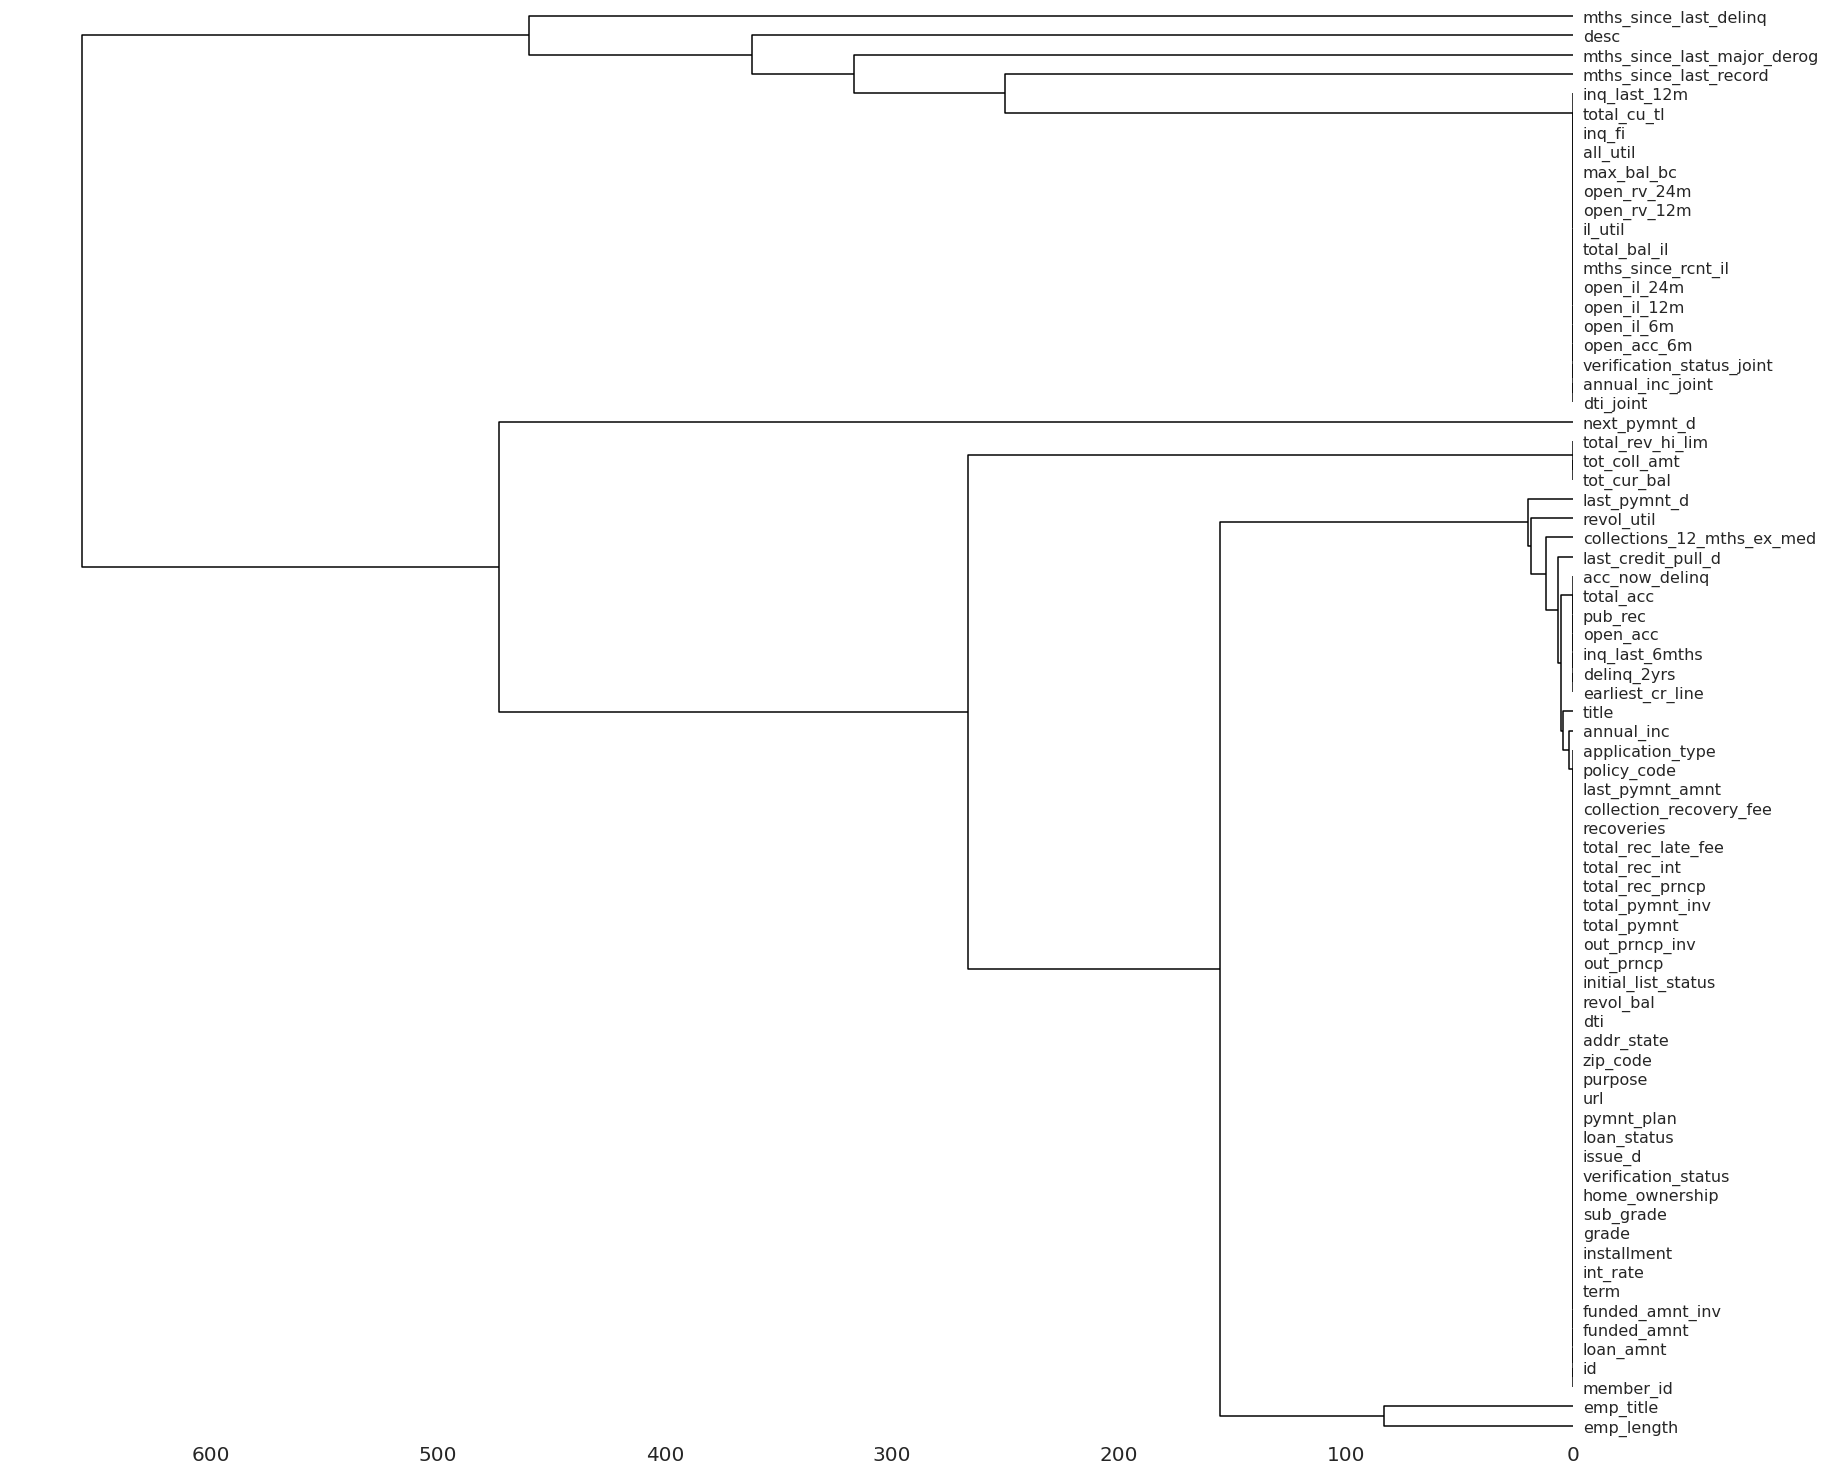

In [11]:
msno.dendrogram(data)

### Missing Values Location

<AxesSubplot:>

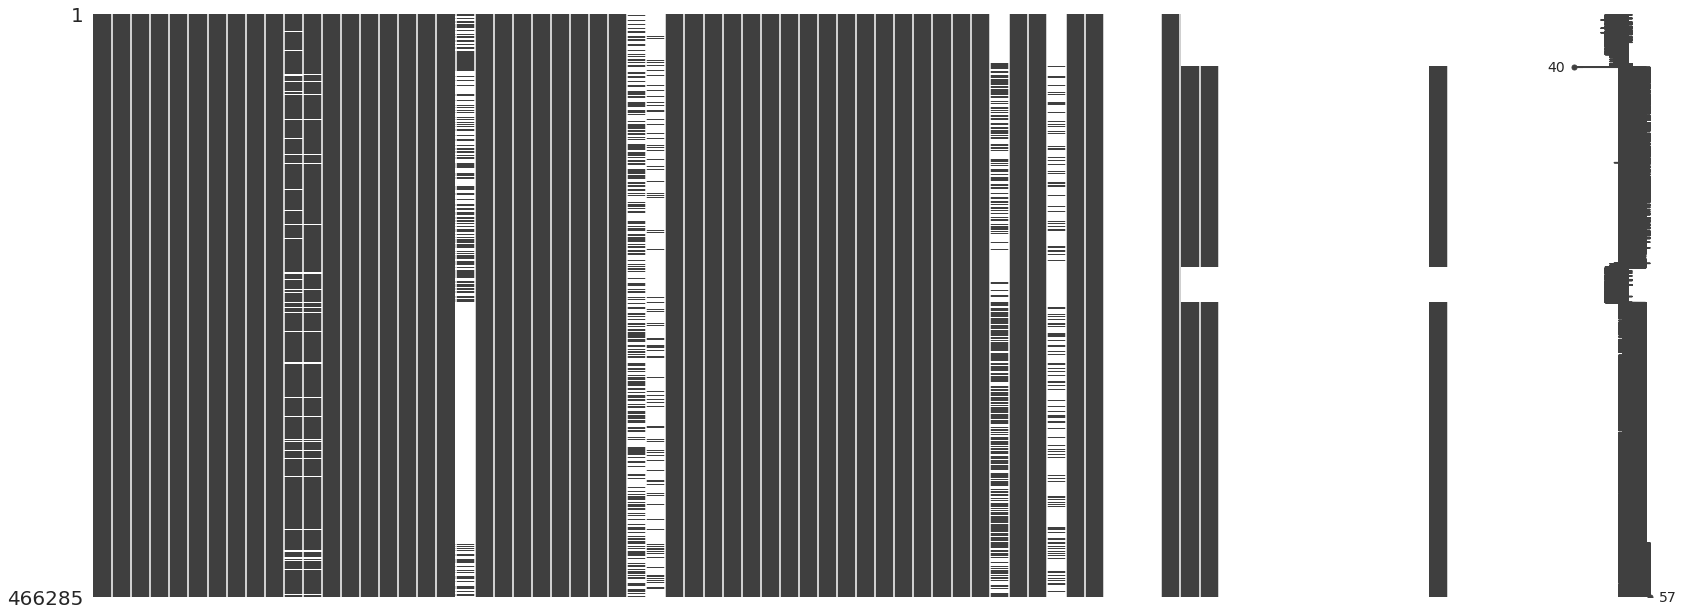

In [12]:
msno.matrix(data)

## Dropping Columns with Many Missing Values

Up to now, I still don't know the right 'rule' about the tolerance of missing values. If you have any clue, please tell me.
<br><br>
So, for this project, I will just drop some columns with missing values of more than 40%. 

### Dropping Columns

In [13]:
data.shape

(466285, 74)

In [14]:
mask = data_null['percentage_null'] > 40
column_null = data_null.loc[mask].index.tolist()

data.drop(columns=column_null, inplace=True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.654,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN


### Update Missing Value List

In [15]:
# total null values
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage_null'})

# combine the columns
data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T

# only show columns that have missing values
mask = data_null['total_null'] != 0
with pd.option_context('display.precision', 0):
  display(data_null.loc[mask].sort_values('total_null', ascending=False).style.background_gradient())

,total_null,percentage_null
total_rev_hi_lim,70276,15
tot_coll_amt,70276,15
tot_cur_bal,70276,15
emp_title,27588,6
emp_length,21008,5
last_pymnt_d,376,0
revol_util,340,0
collections_12_mths_ex_med,145,0
last_credit_pull_d,42,0
delinq_2yrs,29,0


In [16]:
data.shape

(466285, 52)

I have deleted 22 columns. Now, the highest column that has missing values is only 15%.

In [17]:
mask = data_null['total_null'] != 0
column_null = data_null[mask].index.tolist()
column_null

['emp_title',
 'emp_length',
 'annual_inc',
 'title',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'last_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

# Data Preprocessing

## Visualization Function

### Stacked Bar Plot

In [18]:
def stacked_bar_plot(data, x, y, orient='horizontal', 
                     ax=None, show=True, annot=True, sortby='values', 
                     title=None, index_type=None, color=['#FC4F30', '#008FD5']):
  # create axis if not present
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))
  
  # create specific color
  if color == 'single':
    color = ['#FC4F30', '#C2C2C2']

  # create crosstab based on the input data
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')
  crosstab = crosstab.reindex(['Bad', 'Good'], axis=1)
  if index_type != None:
    crosstab.index = crosstab.index.astype(index_type)

  # visualize stacked barplot
  if orient == 'vertical':
    # order in descending (the highest value on the left)
    if sortby == 'index':
      crosstab = crosstab.sort_index(ascending=True)
    else:
      crosstab = crosstab.sort_values('Bad', ascending=False)
    crosstab.plot(kind='bar', stacked=True, color=color, ax=ax)

    # add percentage label
    if annot:
      for i, index in enumerate(crosstab.index):
          for (proportion, y_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
            ax.text(x=i,
                    y=(y_loc - proportion) + (proportion / 2),
                    s=f'{proportion*100:.1f}%',
                    color='white',
                    fontsize=14,
                    fontweight='bold',
                    horizontalalignment='center',
                    verticalalignment='center')
    # remove tick labels
    ax.set_yticklabels([])
  else: # default is horizontal bar plot, even if the orient input is an arbitrary value
    # orient in ascending (the highest value on the top)
    if sortby == 'index':
      crosstab = crosstab.sort_index(ascending=False)
    else:
      crosstab = crosstab.sort_values('Bad', ascending=True)
    crosstab.plot(kind='barh', stacked=True, color=color, ax=ax)

    # add percentage label
    if annot:
      for i, index in enumerate(crosstab.index):
          for (proportion, x_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
            ax.text(y=i,
                    x=(x_loc - proportion) + (proportion / 2),
                    s=f'{proportion*100:.1f}%',
                    color='white',
                    fontsize=14,
                    fontweight='bold',
                    horizontalalignment='center',
                    verticalalignment='center')
    # remove tick labels
    ax.set_xticklabels([])

  if title == None:
    x_titleize = inflection.titleize(x)
    ax.set_title(f'Loan Credit Risk Probability by {x_titleize}')
  else:
    ax.set_title(title)
    
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='', frameon=False)
  # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)
  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

### Rank Bar Plot

In [73]:
def rank_bar_plot(data, x, y, threshold_top=5, threshold_bot=None, 
                  custom_label=False, ax=None, show=True):
  # custom palette top associations
  if threshold_bot == None:
    threshold_bot = data.size - threshold_top - 1

  palette = []
  for i in range(0, len(data)):
    if i < threshold_top:
      palette.append('#008FD5') # blue
    elif i > threshold_bot:
      palette.append('#FC4F30') # red
    else:
      palette.append('silver')

  if ax == None:
    _, ax = plt.subplots(figsize=(8,16))

  sns.barplot(x=x, y=y, ax=ax, palette=palette, saturation=1)

  if custom_label == True:
    # custom y label color
    for i, label in enumerate(ax.yaxis.get_ticklabels()):
      if (i >= threshold_top) and (i <= threshold_bot):
        label.set_color('silver')
  
    # custom bar label visibility
    for con in ax.containers:
      # labels = [val for val in con.datavalues]
      labels = con.datavalues
      labels_len = len(labels)

      # masking the top 3 an bottom 3
      np.put(labels, np.arange(3,labels_len-3), [-1])
      
      # hide the labels for non-top 3 and non-bottom 3
      labels = [f'{val:.2f}' if val != -1 else '' for val in labels]

      ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')
  else:
    ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

  ax.set_xticklabels([])
  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

### KDE Probability Plot

In [19]:
def kde_proba_plot(data, x, hue, ax=None, show=True, xlabel=None, alpha=0.9,
                   xticks_step=100, palette=['#008FD5', '#FC4F30']):
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))
  
  if xlabel == None:
    xlabel = inflection.titleize(x)

  if palette == 'single':
    palette = ['#C2C2C2', '#FC4F30']

  ax.grid(False, axis='x')

  sns.kdeplot(data=data, x=x, hue=hue, multiple='fill',
              linewidth=3, ax=ax, alpha=alpha, palette=palette)
  sns.move_legend(ax, 'lower center', bbox_to_anchor=(.5, 1), title='', ncol=2, frameon=False)

  ax.set_xticks(np.arange(0, data[x].max(), xticks_step))
  ax.set_xlim(data[x].min(), data[x].max())
  ax.set_xlabel(xlabel)

  ax.set_yticks(np.linspace(0,1,5))
  ax.set_ylabel('probability')

  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

### Heatmap Correaltion

In [93]:
def heatmap_corr_plot(data, mask=None, annot=None, cbar=False,
                      ax=None, show=True):
  if mask:
    mask = np.triu(np.ones_like(data, dtype=bool))

  if ax == None:
    _, ax = plt.subplots(figsize=(40,40))

  sns.heatmap(data, vmin=-1, vmax=1, cbar=False,
              cmap='coolwarm', linewidth=1, mask=mask,
              square=True, annot=True, annot_kws={'fontsize':16}, fmt='.2f', ax=ax)

  if show:
    plt.show()

### Save Figure

In [20]:
def save_fig(fname, format='svg'):
  drive = '/content/drive/MyDrive/My Projects/2022/Internship - id x partners/output/'
  # fname = 'issue-date-probability.svg'
  path = drive + fname
  plt.savefig(path, format=format, bbox_inches='tight', facecolor='white')

## Target Variable

### Identifying Target Variable

This dataset information doesn't give an explicit information about its target variable. After reading all of the provided attribute information, I end up in a conclusion: The target variable is the loan status.

In [21]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [22]:
data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

As shown above, the loan status has many categories.
<br><br>

Based on [LendingClub](https://help.lendingclub.com/hc/en-us/articles/216109367-What-do-the-different-Note-statuses-mean-), the definition of each status is:
- `Fully Paid`: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.
- `Current`: Loan is up to date on all outstanding payments.
- `In Grace Period`: Loan is past due but within the 15-day grace period.
- `Late (16-30)`: Loan has not been current for 16 to 30 days.
- `Late (31-120)`: Loan has not been current for 31 to 120 days.
- `Default`: Loan has not been current for 121 days or more.
- `Charged Off`: Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached.
<br><br>

Based on those descriptions, I will create a new feature whether the loan status is `Good` or `Bad`. 
<br><br>

The `Good` status is when the loan status is either `Current` or `Fully Paid`, otherwise the status is `Bad`.
<br><br>

I won't include the `Does not meet the credit policy. Status:Fully Paid` as a `Good` status, because it doesn't meet the credit policy.

In [23]:
good_status = ['Fully Paid', 'Current']

data['target'] = data['loan_status'].apply(lambda x: 'Good' if x in good_status else 'Bad')

In [51]:
data.drop(columns='loan_status', inplace=True)

### Target Distribution

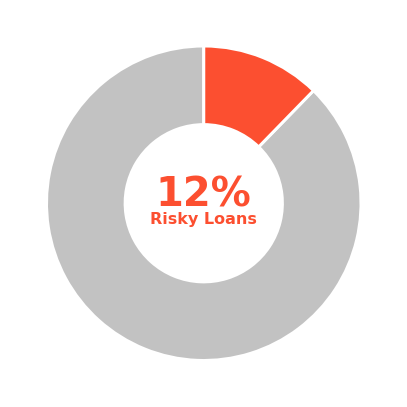

In [25]:
pie_data = data['target'].value_counts(normalize=True).values * 100
pie_label = data['target'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges = ax.pie(pie_data, startangle=90,
                wedgeprops={'width':0.5, 'linewidth':3},
                colors=['#C2C2C2', '#FC4F30'])

text_1 = f'{pie_data[1]:.0f}%'
text_2 = 'Risky Loans'

ax.text(0, 0.05, text_1, fontsize=40, fontweight='bold', color='#FC4F30',
        horizontalalignment='center',
        verticalalignment='center')
ax.text(0, -0.1, text_2, fontsize=16, fontweight='bold', color='#FC4F30',
        horizontalalignment='center',
        verticalalignment='center')

plt.tight_layout()

plt.show()

As we can see, 12% of borrowers have bad loan status. Technically speaking, this dataset is an imbalanced dataset.

## Dropping Columns

### Single Variation

I will drop the `application_type` since it only has a single variation

In [26]:
data.drop(columns=['application_type'], inplace=True)

### High Cardinality

I will drop some categorical columns that have too many categories and hard to find its pattern. From the previous section, we know that `title`, `emp_title`, and `url` have a high cardinality. So, I will drop it.

In [27]:
data.drop(columns=['title', 'emp_title', 'url'], inplace=True)

### Zip Code

In [28]:
data[['zip_code', 'addr_state']].sort_values('zip_code').head(10)

,zip_code,addr_state
29984,007xx,NJ
342425,007xx,FL
285814,007xx,PA
325695,008xx,VA
231293,010xx,MA
9236,010xx,MA
43706,010xx,MA
113322,010xx,MA
113272,010xx,MA
9270,010xx,MA


As we can see, a same zip code has different address state. So, I think zip code (in this dataset) doesn't give an exact information. So, I will drop it.

In [29]:
data.drop(columns=['zip_code'], inplace=True)

### ID Number

I think, the ID number (`id` and `member_id`) doesn't give any information about the borrowers. I will drop it.

In [30]:
data.drop(columns=['id', 'member_id'], inplace=True)

### Very Imbalanced

There are some categorical features that have imbalanced distribution. So, I will drop it.

In [40]:
data.drop(columns=['pymnt_plan', 'addr_state'], inplace=True)

### Update Column List

In [31]:
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

data[column_categorical].nunique().sort_values()

term                     2
pymnt_plan               2
initial_list_status      2
target                   2
verification_status      3
home_ownership           6
grade                    7
loan_status              9
emp_length              11
purpose                 14
sub_grade               35
addr_state              50
issue_d                 91
last_pymnt_d            98
last_credit_pull_d     103
earliest_cr_line       664
dtype: int64

As seen above, the last 4 columns that have the highest variation are date columns.

## Date Features

I do this project on a limited time. So, this is a simple approach to handle the date columns. I will just use the 'year' instead of 'month-year' format. Fortunately, the date columns are in a fixed format (and clean!). I just need to convert to datetime format.

### Extract Year

In [32]:
column_date = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']

for col in column_date:
  # split to individual columns
  tmp = data[col].str.split('-', expand=True)
  tmp = tmp.rename(columns={0:'month', 1:'year'})

  # convert the 'year' column to numeric
  tmp['year'] = pd.to_numeric(tmp['year'], errors='coerce')
  
  # assign to the original dataset
  # data_viz[col] = tmp['year']

  print(np.sort(tmp['year'].unique()))

[ 7  8  9 10 11 12 13 14]
[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan]
[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 44. 46. 48. 49. 50. 51.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. 99. nan]


I have to add the year prefix (its century) to avoid misleading information.

In [33]:
column_date = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']
column_date_split = list()

for col in column_date:
  # define the column names
  col_year = f'{col}_year'

  column_date_split.append(col_year)

  # split to individual columns
  tmp = data[col].str.split('-', expand=True)
  tmp = tmp.rename(columns={0:'month', 1:'year'})

  # add year prefix (century), whether it's 19 or 20
  tmp['year'] = tmp['year'].apply(lambda x: np.nan if pd.isna(x) else 
                                  (f'20{x}' if int(x) <= 16 else f'19{x}'))

  # convert the 'year' column to numeric
  tmp['year'] = pd.to_numeric(tmp['year'], errors='coerce')
  
  # assign to the original dataset
  data[col_year] = tmp['year']
  
  print(np.sort(tmp['year'].unique()))

[2007 2008 2009 2010 2011 2012 2013 2014]
[2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.   nan]
[2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.   nan]
[1944. 1946. 1948. 1949. 1950. 1951. 1953. 1954. 1955. 1956. 1957. 1958.
 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970.
 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982.
 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994.
 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006.
 2007. 2008. 2009. 2010. 2011.   nan]


In [34]:
data.loc[:5, column_date]

,issue_d,last_pymnt_d,last_credit_pull_d,earliest_cr_line
0,Dec-11,Jan-15,Jan-16,Jan-85
1,Dec-11,Apr-13,Sep-13,Apr-99
2,Dec-11,Jun-14,Jan-16,Nov-01
3,Dec-11,Jan-15,Jan-15,Feb-96
4,Dec-11,Jan-16,Jan-16,Jan-96
5,Dec-11,Jan-15,Sep-15,Nov-04


In [35]:
data.loc[:5, column_date_split]

,issue_d_year,last_pymnt_d_year,last_credit_pull_d_year,earliest_cr_line_year
0,2011,2015.0,2016.0,1985.0
1,2011,2013.0,2013.0,1999.0
2,2011,2014.0,2016.0,2001.0
3,2011,2015.0,2015.0,1996.0
4,2011,2016.0,2016.0,1996.0
5,2011,2015.0,2015.0,2004.0


### Drop Columns

In [44]:
data.drop(columns=column_date, inplace=True)

In [45]:
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

data[column_categorical].nunique().sort_values()

term                    2
initial_list_status     2
target                  2
verification_status     3
home_ownership          6
grade                   7
loan_status             9
emp_length             11
purpose                14
sub_grade              35
dtype: int64

## Feature Associations

I will calculate the associations between each features to the target variable. Then, I will drop some features that have very small associations to the target variable.
<br><br>
I will mark the independent features that are highly correlated to each other, or we can say it as multicollinearity.

In [53]:
# update column list
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

# calculate the associations (correlation) between features
associations_out = associations(data,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['target'].drop('target').sort_values(ascending=False)

### Associations to Target

Associations can be used to describe the relationship between features.

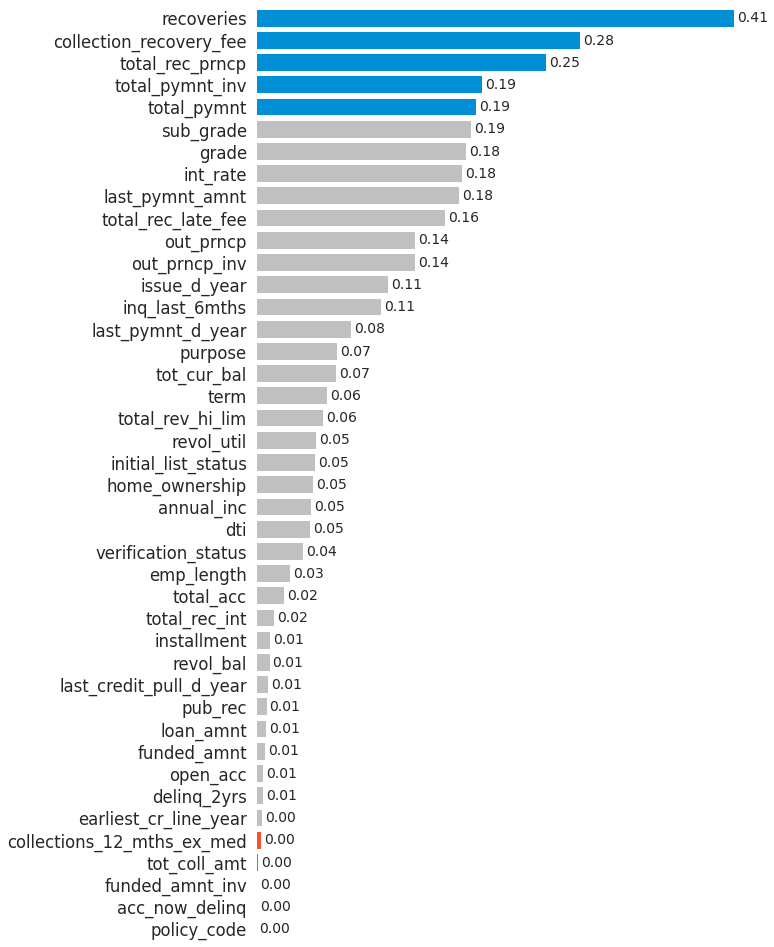

In [72]:
_, ax = plt.subplots(figsize=(8,16))

rank_bar_plot(data=corr_target, x=corr_target.values, y=corr_target.index, ax=ax)

### Drop Low Associations

In [74]:
column_low_assc = ['earliest_cr_line_year', 'collections_12_mths_ex_med',
                   'tot_coll_amt', 'funded_amnt_inv', 
                   'acc_now_delinq', 'policy_code']

data.drop(columns=column_low_assc, inplace=True)

### Multicollinearity

In [75]:
# update column list
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

# calculate the associations (correlation) between features
associations_out = associations(data,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['target'].drop('target').sort_values(ascending=False)

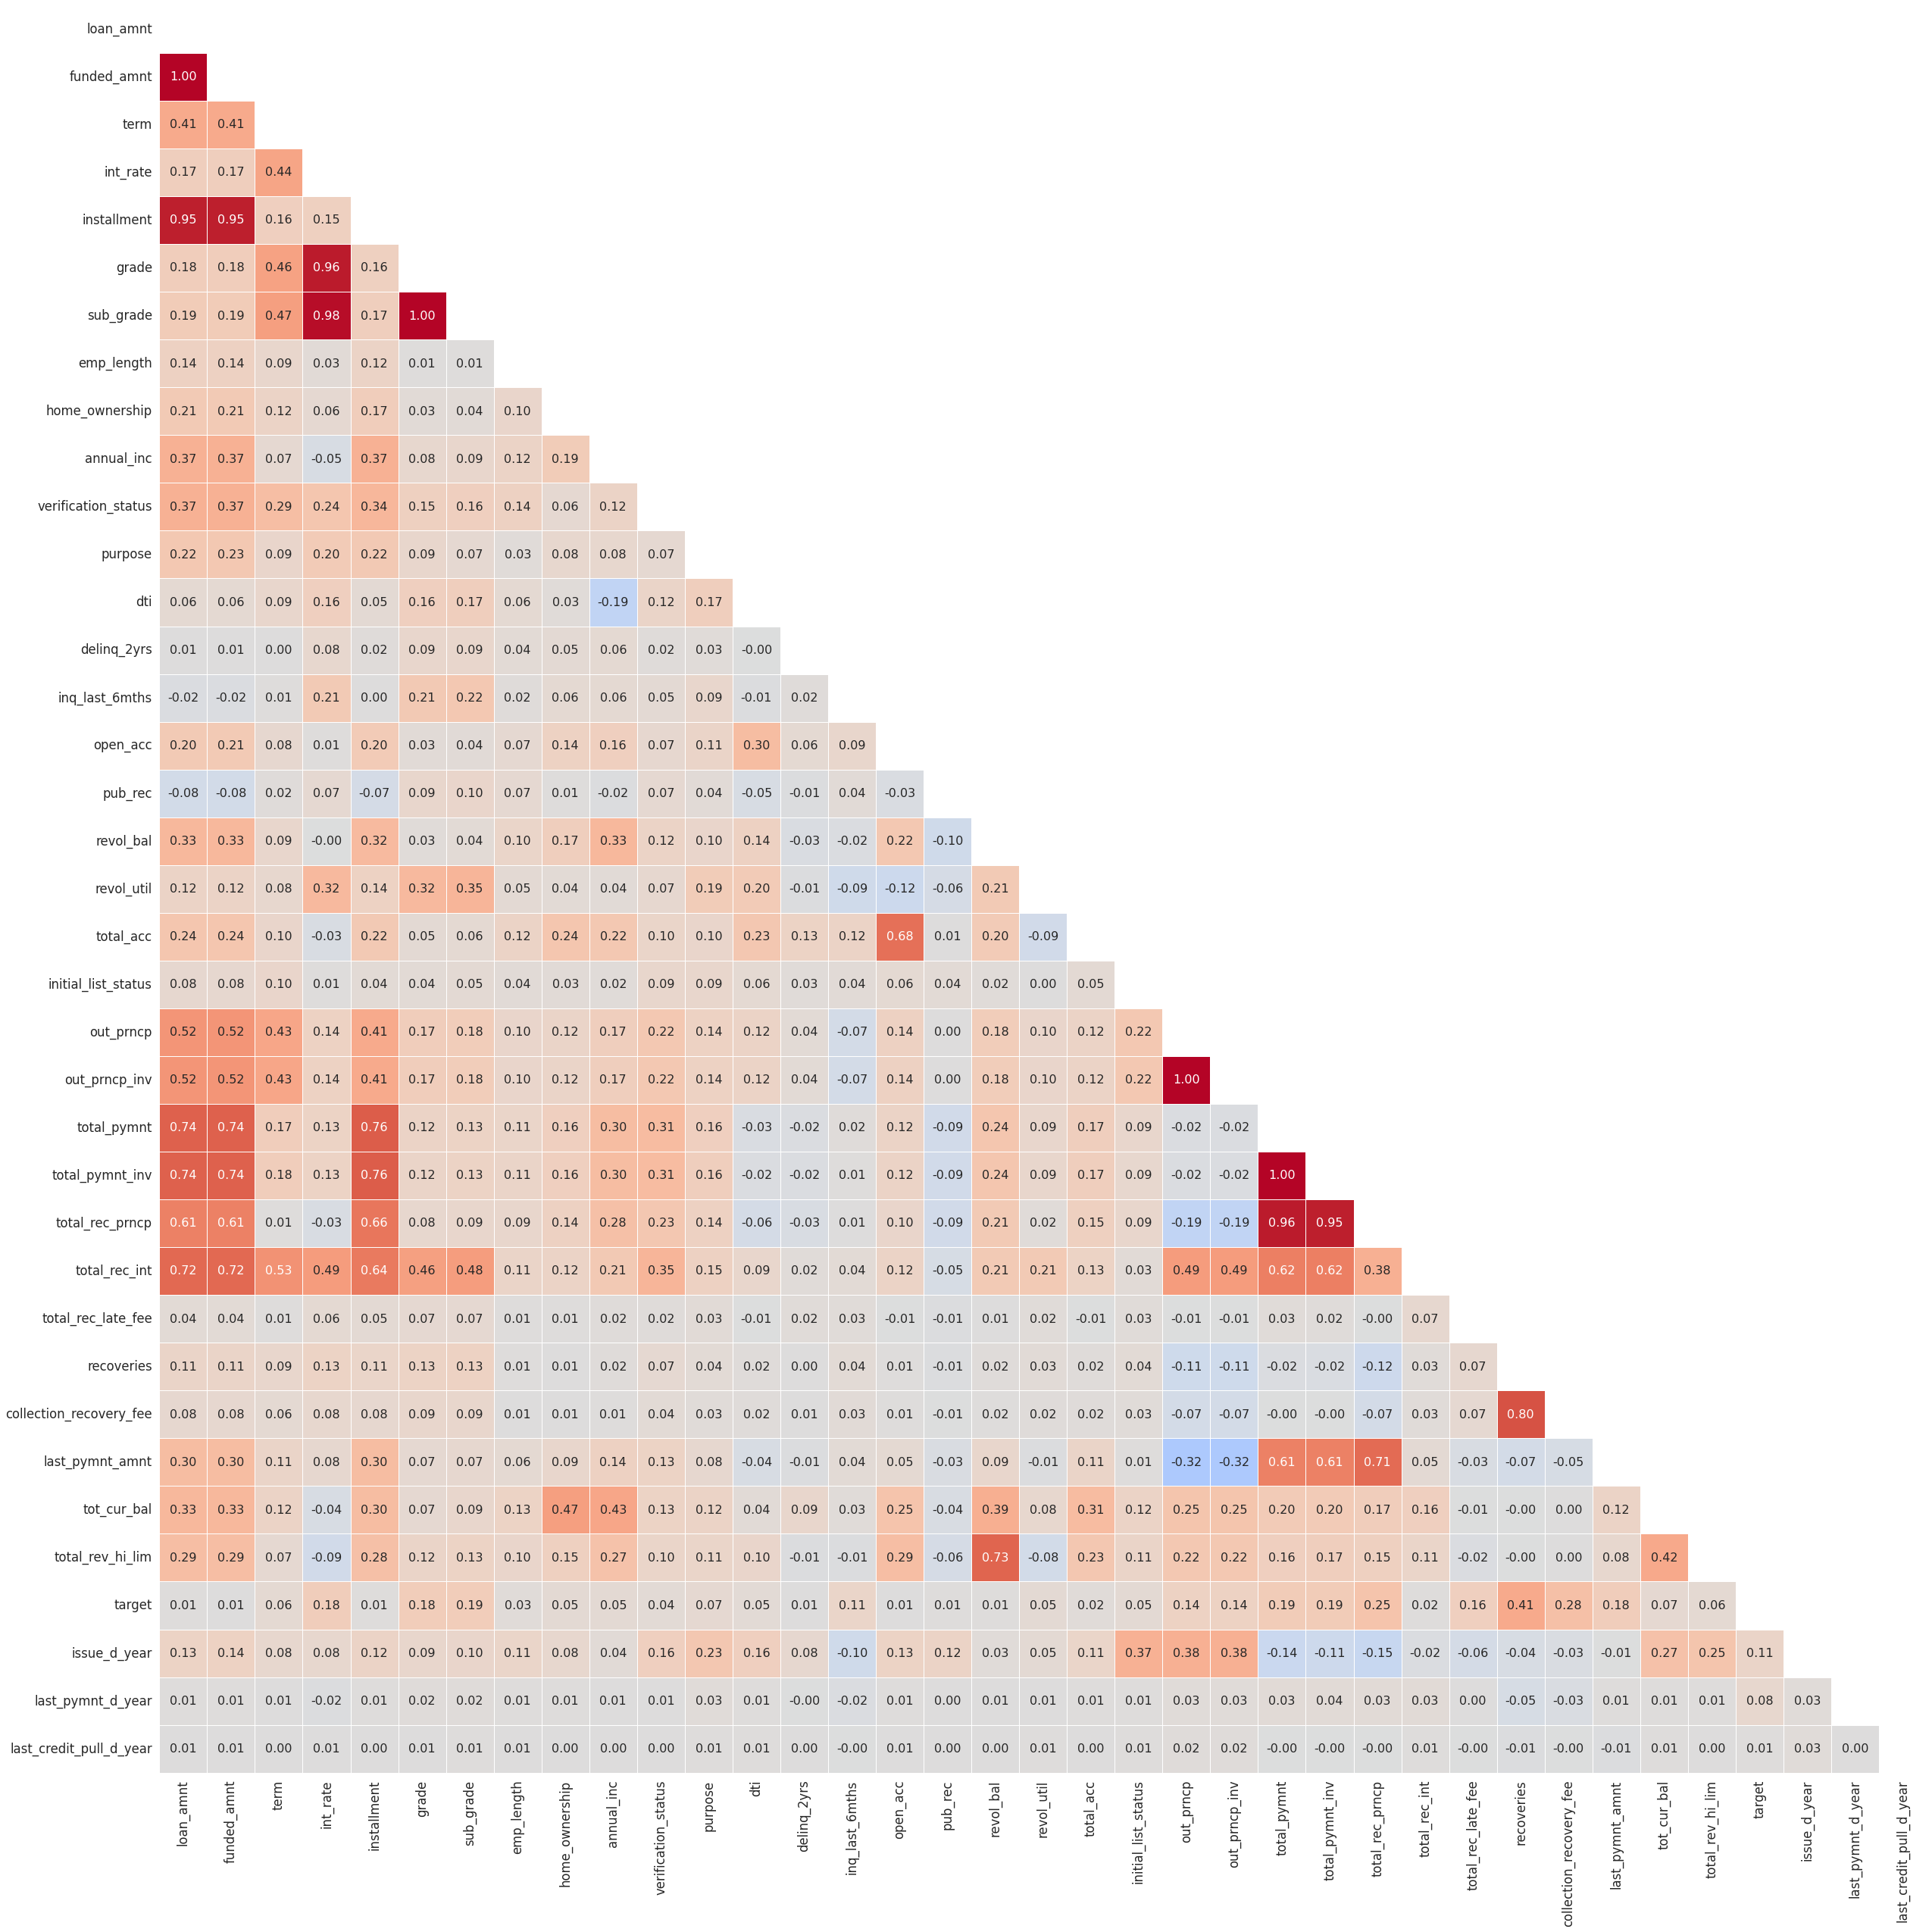

In [88]:
_, ax = plt.subplots(figsize=(40,40))

heatmap_corr_plot(corr_all, mask=True, annot=True, ax=ax)

At glance, there are some multicollinearity. To check multicollinearity, we can use Variance Inflation Factor (VIF). But, I will not do it now.
<br><br>
There are two simple and commonly used ways to correct multicollinearity, as listed below:
- The first one is to remove one (or more) of the highly correlated variables. Since the information provided by the variables is redundant, the coefficient of determination will not be greatly impaired by the removal.
- The second method is to use principal components analysis (PCA) or partial least square regression (PLS) instead of OLS regression. PLS regression can reduce the variables to a smaller set with no correlation among them. In PCA, new uncorrelated variables are created. It minimizes information loss and improves the predictability of a model.
<br>

[Source](https://corporatefinanceinstitute.com/resources/knowledge/other/variance-inflation-factor-vif/)

### Handling Multicollinearity

For now, I will just drop some features (independent variables) that are highly correlated to each other. My strategy is, to find the features that have multicollinearity, then drop the features that have the lowest associations to the target variable.
<br><br>
I'm not calculating the VIF because I haven't encoded the categorical features. I will recheck the multicollinearity later.
<br><br>
Note: I still don't know the correlation threshold to be called "highly correalted". So, I will just drop features that have correlation more than 0.8

In [90]:
column_corr = ['loan_amnt', 'funded_amnt',
               'grade', 'int_rate',
               'out_prncp_inv', 
               'total_pymnt', 'total_pymnt_inv',
               'collection_recovery_fee']

data.drop(columns=column_corr, inplace=True)

In [91]:
# update column list
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

# calculate the associations (correlation) between features
associations_out = associations(data,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['target'].drop('target').sort_values(ascending=False)

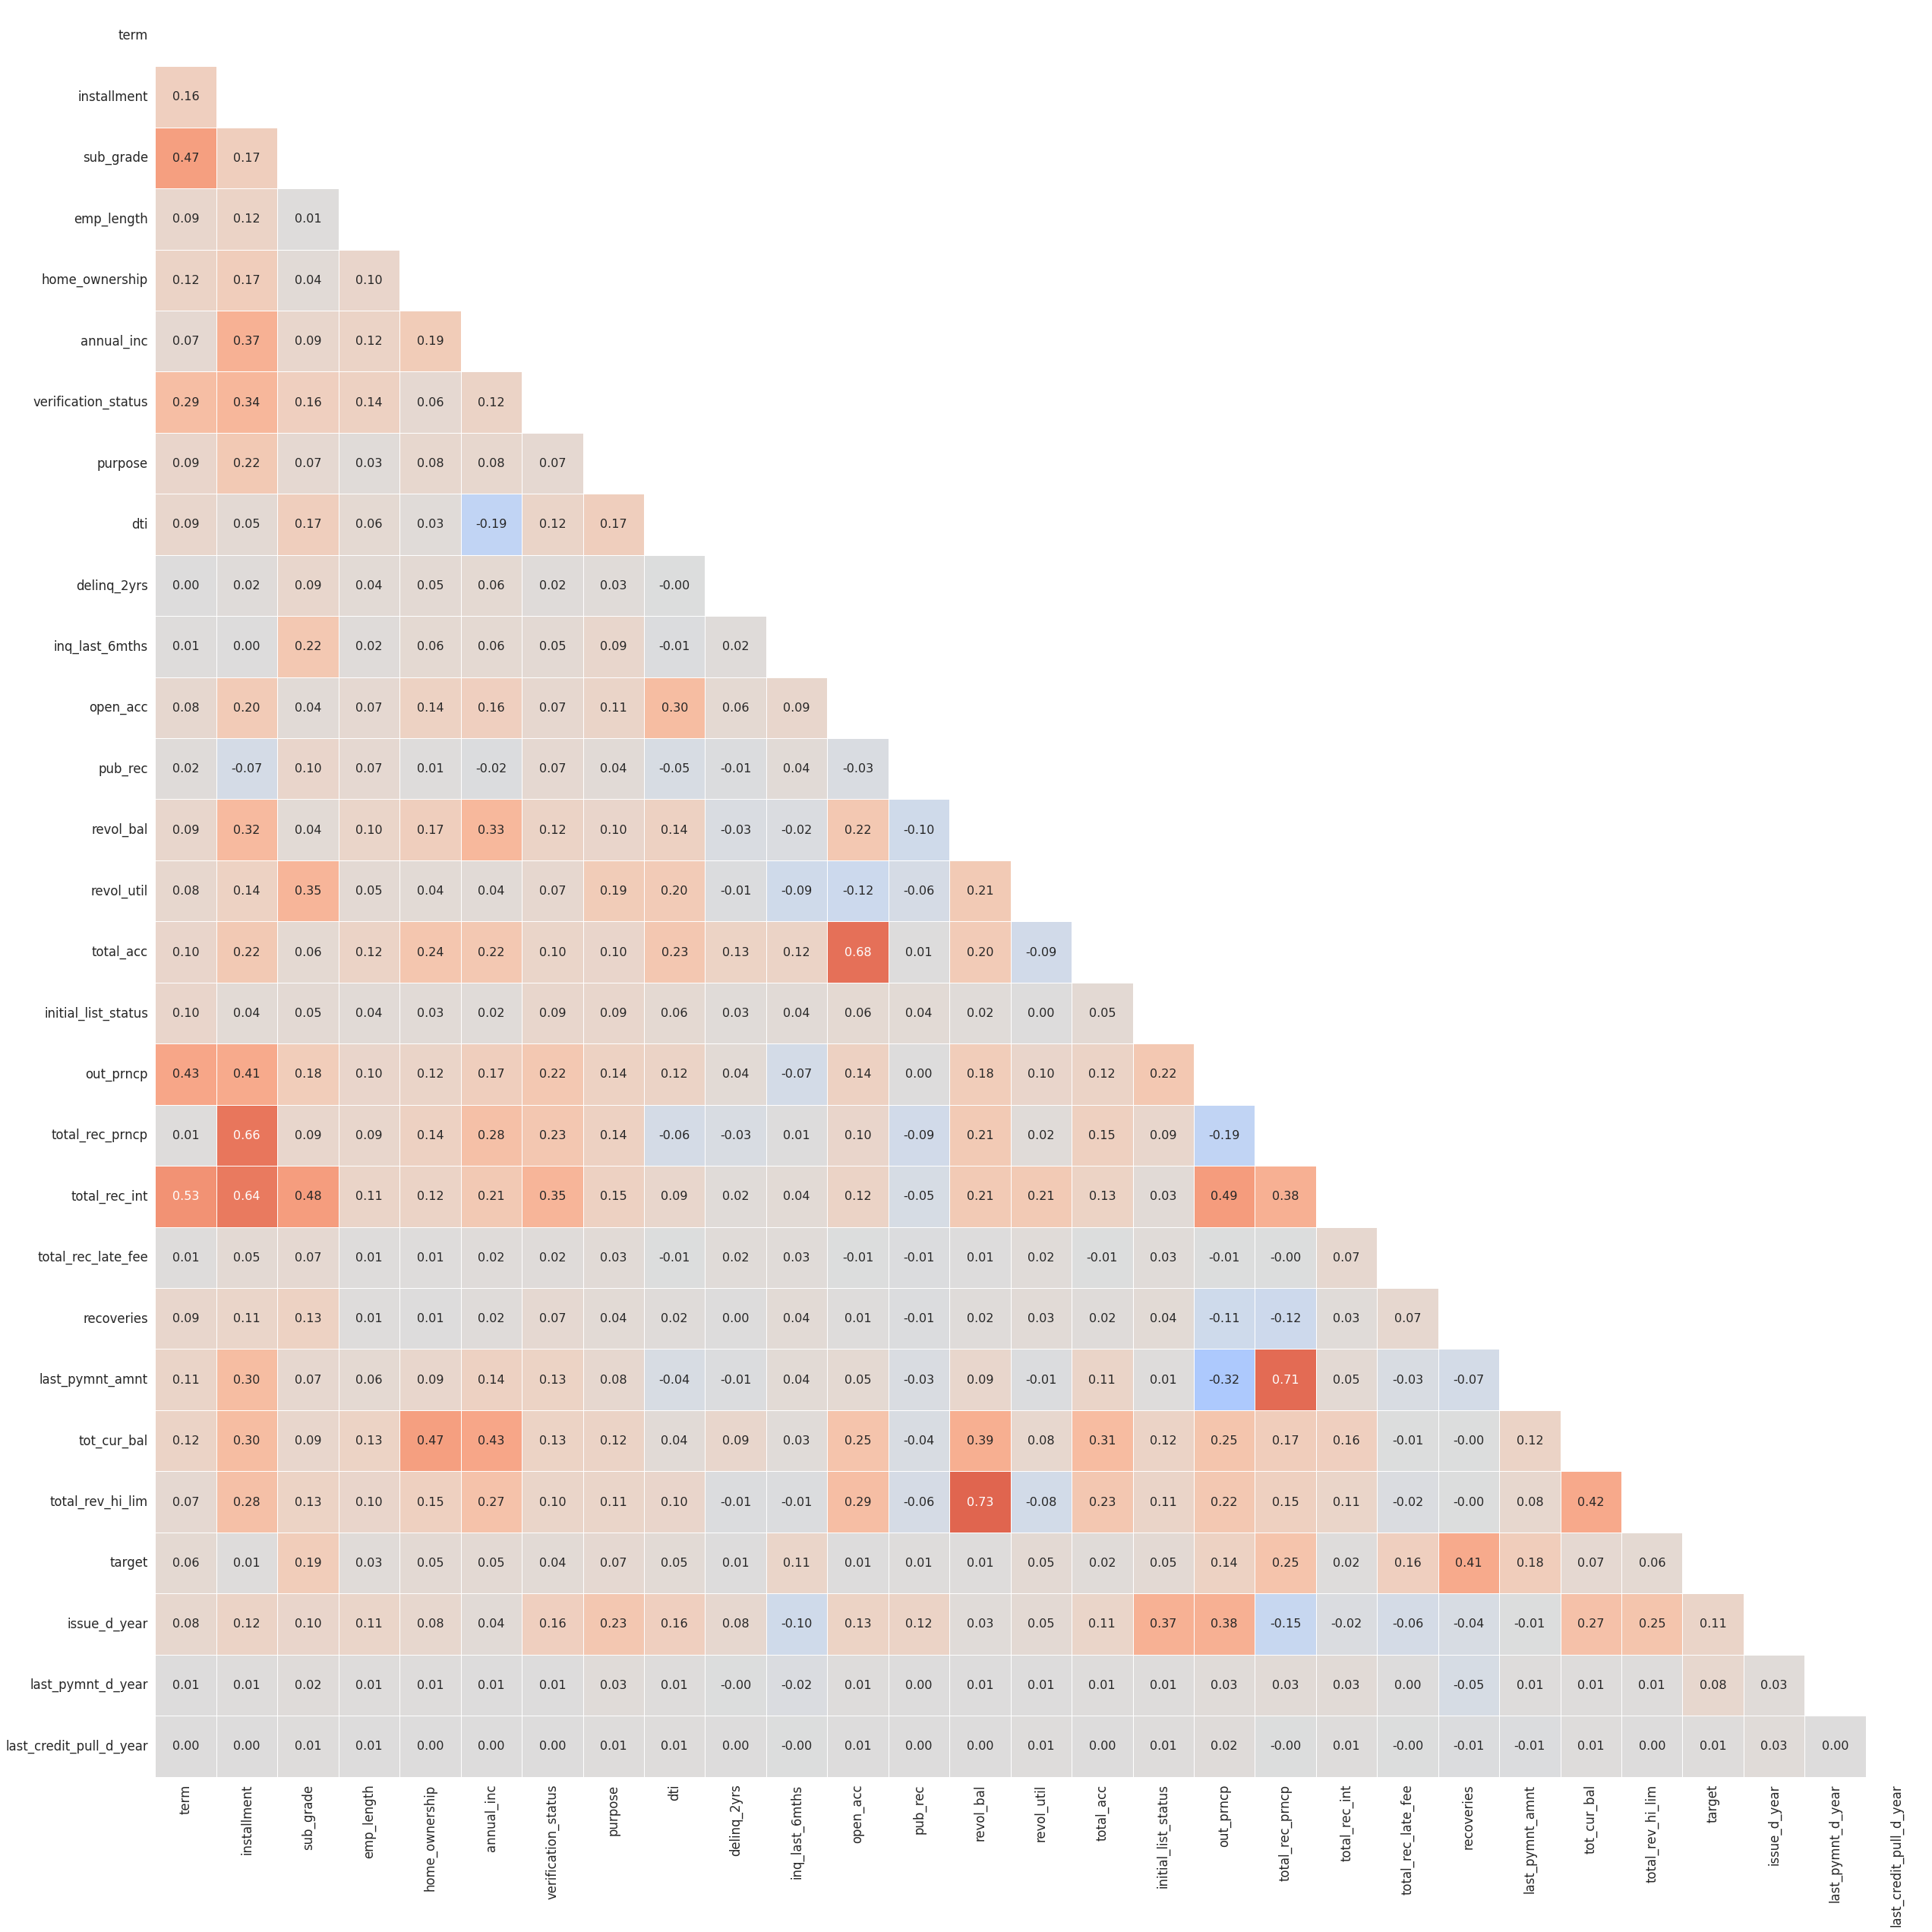

In [92]:
_, ax = plt.subplots(figsize=(40,40))

heatmap_corr_plot(corr_all, mask=True, annot=True, ax=ax)

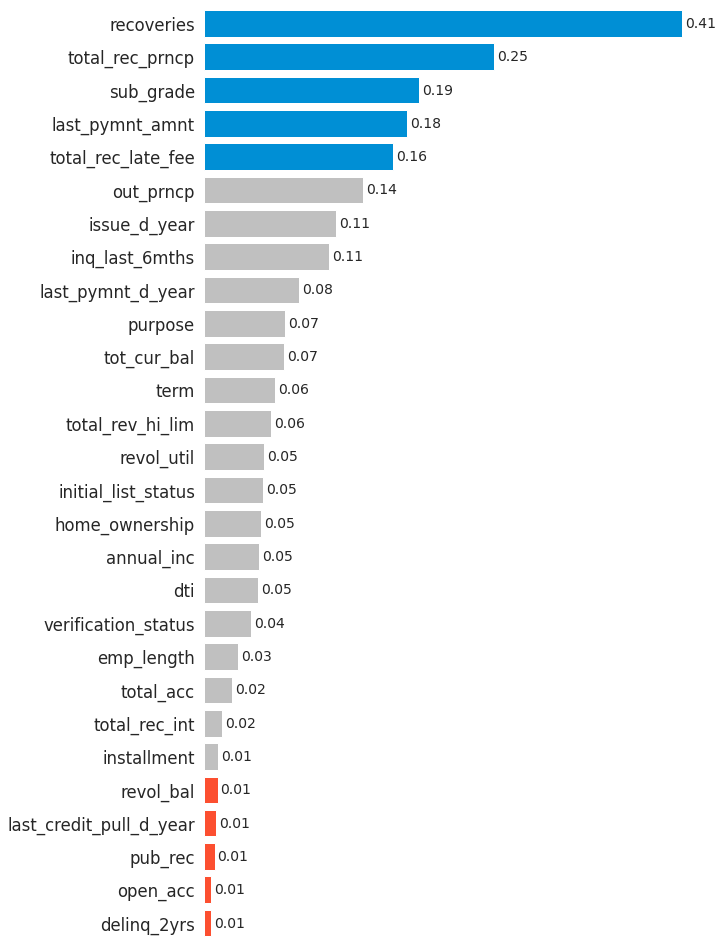

In [95]:
_, ax = plt.subplots(figsize=(8,16))

rank_bar_plot(data=corr_target, x=corr_target.values, y=corr_target.index, ax=ax)

## Skewness & Kurtosis

In [97]:
# update column list
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

column_numerical

['installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'last_pymnt_amnt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'issue_d_year',
 'last_pymnt_d_year',
 'last_credit_pull_d_year']

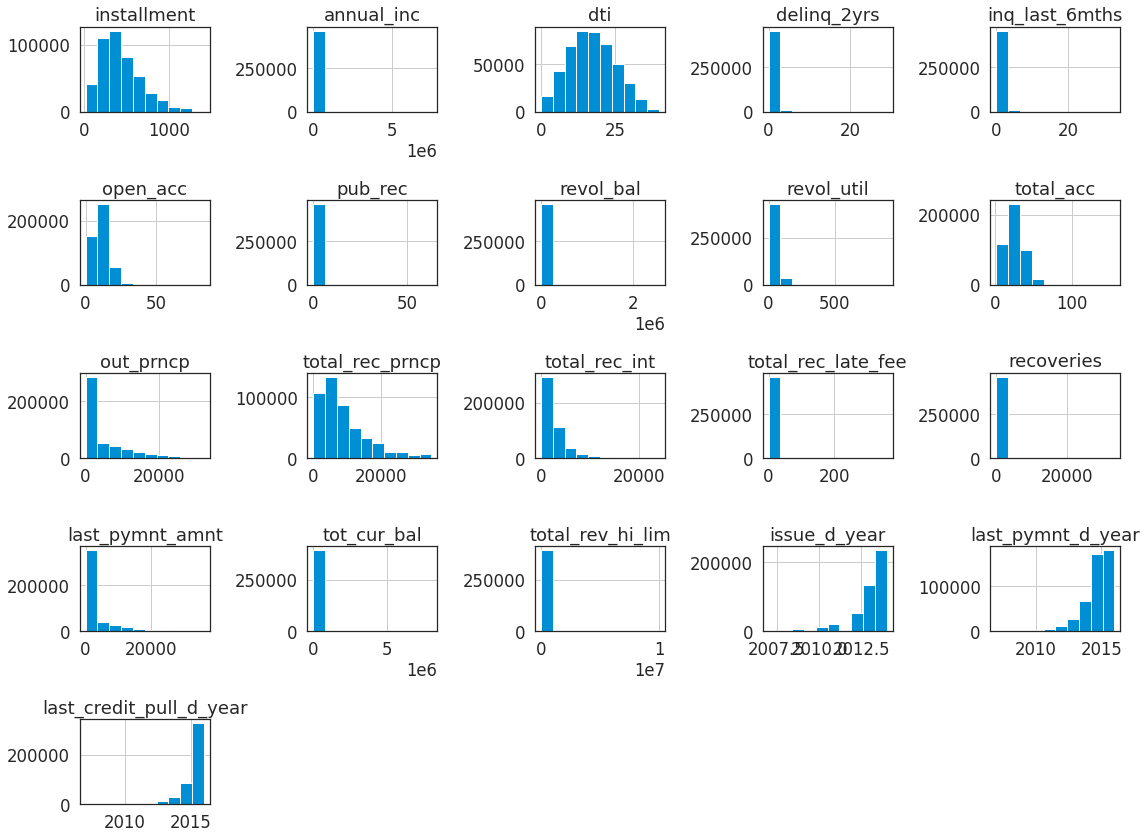

In [98]:
data[column_numerical].hist(figsize=(16,12))

plt.tight_layout()
plt.show()

At glance, we can see that there are some features that are very skewed.

### Interpreting Skewness

The rule of thumb for interpreting the skewness values:
- If skewness is less than −1 or greater than +1, the distribution can be called highly skewed.
- If skewness is between −1 and −½ or between +½ and +1, the distribution can be called moderately skewed.
- If skewness is between −½ and +½, the distribution can be called approximately symmetric.
<br>

[Source](https://brownmath.com/stat/shape.htm#SkewnessInterpret)

In [132]:
skewness = data[column_numerical].skew().sort_values(ascending=False)
skewness = pd.DataFrame(skewness).rename(columns={0:'skewness'})
skewness.style.background_gradient()

,skewness
total_rev_hi_lim,100.586
annual_inc,29.569
revol_bal,19.476
pub_rec,14.941
total_rec_late_fee,13.843
recoveries,13.150
delinq_2yrs,5.346
tot_cur_bal,3.048
last_pymnt_amnt,2.561
total_rec_int,2.268


Almost all of the numerical features are skewed!

### Interpreting Kurtosis

- A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0). Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic.
- A distribution with kurtosis \<3 (excess kurtosis \<0) is called platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.
- A distribution with kurtosis \>3 (excess kurtosis \>0) is called leptokurtic. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.
<br>

[Source](https://brownmath.com/stat/shape.htm#Kurtosis)

In [124]:
kurtosis = data[column_numerical].kurtosis().sort_values(ascending=False)
kurtosis = pd.DataFrame(kurtosis).rename(columns={0:'kurtosis'})
kurtosis.style.background_gradient()

,kurtosis
total_rev_hi_lim,26001.493
annual_inc,3071.114
revol_bal,1433.063
pub_rec,1116.391
recoveries,330.049
total_rec_late_fee,329.075
delinq_2yrs,53.144
tot_cur_bal,39.777
inq_last_6mths,13.864
total_rec_int,7.159


There are some features that have kurotsis value more or less than 3.

### Handling Skewness

There are some methods that can be used to handle skewness, such as:
- Log transform
- Square root transform
- Box Cox
- Fisher
- Power Transform
- etc
<br>

I will do power transformation for numerical features, except the date features.
<br><br>
When I do the power transformation for date features, I always get errors and I still can't resolve it. So, I will use another transformation for date features.

#### Numerical Features

In [102]:
column_date = ['issue_d_year', 'last_pymnt_d_year', 'last_credit_pull_d_year']

column_numerical = [col for col in column_numerical if col not in column_date]

In [105]:
data_tmp = data.copy()

for col in column_numerical:
  pt = PowerTransformer(method='yeo-johnson')
  data_tmp[col] = pt.fit_transform(data_tmp[col].values.reshape(-1,1))

# Reference and Further Reading

- LendingClub. "What do the different Note statuses mean?" ([source](https://help.lendingclub.com/hc/en-us/articles/216109367-What-do-the-different-Note-statuses-mean-))
- Corporate Finance Institute. "Variance Inflation Factor (VIF)" ([source](https://corporatefinanceinstitute.com/resources/knowledge/other/variance-inflation-factor-vif/))
- Analytics Vidhya. "What is Multicollinearity? Here’s Everything You Need to Know" ([source](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/))
- ResidentMario. "missingno documentation" ([source](https://github.com/ResidentMario/missingno))
- stochazesthai. "Fisher Transformation" ([source](https://stats.stackexchange.com/questions/155429/how-to-transform-negative-values-to-logarithms))
- GeeksforGeeks. "atanh() function in C++ STL" ([source](https://www.geeksforgeeks.org/atanh-function-in-c-stl/))
- Atul Sharma. "Skewness & Kurtosis Simplified" ([source](https://towardsdatascience.com/skewness-kurtosis-simplified-1338e094fc85))
- BrownMath. "Measures of Shape: Skewness and Kurtosis" ([source](https://brownmath.com/stat/shape.htm))
- Scikit-learn Documentation. "6.3. Preprocessing Data" ([source](https://scikit-learn.org/stable/modules/preprocessing.html))